Profesor: Alberto Vacas

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
import requests

In [269]:
df_bmw=pd.read_csv('bmw_pricing.csv')
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# 1.Análisis inicial de los datos
Objetivo: Limpiar los datos para precedir el precio del vehiculo

In [270]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [271]:
df_bmw.nunique()

marca                             1
modelo                           76
km                             4784
potencia                         61
fecha_registro                  180
tipo_gasolina                     5
color                            10
tipo_coche                        8
volante_regulable                 2
aire_acondicionado                2
camara_trasera                    2
asientos_traseros_plegables       2
elevalunas_electrico              2
bluetooth                         2
gps                               2
alerta_lim_velocidad              2
precio                          437
fecha_venta                      13
dtype: int64

Comprobamos cuantos registros tiene cada columna sin tener en cuenta si tienen nulos o no. Vemos que la columna Marca sólo tiene un valor, por lo que se puede presuponer que podemos eliminar la columna.
Sin embargo, comprobamos si hay nulos.

---



In [272]:
df_bmw.isnull().any()
#df_bmw.nunique(dropna=False) incluye los nulos
#también se puede mirar con df_bmw["marca"].unique()


marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

En la columna marca hay nulos, por lo que debemos ver si puede haber alguna otra marca de vehiculo dentro del dataset. Miramos el porcentaje de datos que representa para ver que tan relevante es esta información.

In [273]:
porcentaje_nulos=df_bmw.isnull().sum()/df_bmw.shape[0]*100
porcentaje_nulos.sort_values(ascending=False)
# puede calcularse tambien con la función len(df_bmw)

asientos_traseros_plegables    70.018584
fecha_registro                 50.030973
tipo_coche                     30.146603
marca                          20.028908
alerta_lim_velocidad           15.032005
bluetooth                      15.032005
aire_acondicionado             10.035102
color                           9.188520
precio                          0.123890
tipo_gasolina                   0.103242
volante_regulable               0.082593
modelo                          0.061945
camara_trasera                  0.041297
elevalunas_electrico            0.041297
km                              0.041297
potencia                        0.020648
fecha_venta                     0.020648
gps                             0.000000
dtype: float64

Mirando el volumen que representa, no podemos eliminar la columna ya que es un 20%. Podemos chequear otro camino ya que intuimos que la información es redundante.
Chequearemos que registros sin marca asignada tienen modelos asociados a BMW.

In [274]:
modelo_nulo=df_bmw[df_bmw["marca"].isnull()]["modelo"].unique()
print(modelo_nulo)

['118' 'Z4' '325' '218' '120' 'M235' '425' '435' '640' '420' '220' 'M4'
 '320' '630' '318' '520' '316' '535' '525' '518' '530' 'M550' '330' '116'
 '528' '328' '125' '420 Gran Coupé' '114' '320 Gran Turismo'
 '318 Gran Turismo' '530 Gran Turismo' '418 Gran Coupé' '520 Gran Turismo'
 '135' '435 Gran Coupé' '640 Gran Coupé' '740' '730' 'X1' 'X3' 'X5' 'X6'
 'X4' 'X6 M' 'X5 M' 'X5 M50' '220 Active Tourer' '218 Active Tourer'
 '225 Active Tourer' '218 Gran Tourer']


Vemos que todos los modelos con filas en la columna marca tienen NA son modelos de BMW.

In [275]:
df_bmw_2=df_bmw.copy()
df_bmw_2.drop(columns="marca", inplace=True)

Además, hemos visto que en la columna "asientos_traseros_plegables" hay un 70% de datos que son NA. Vemos que datos hay dentro, para confirmar si son relevantes, y si no lo son, también la eliminaremos.

In [276]:
df_bmw_2["asientos_traseros_plegables"].value_counts(dropna=False)

asientos_traseros_plegables
NaN      3391
False    1150
True      302
Name: count, dtype: int64

Chequearemos si hay vehiculos, que tengan el mismo modelo (una de las columnas con menos elementos nulos), que tengan un cambio en el precio en función de si tienen o no asientos traseros plegables

In [277]:
def separate_values(df, columna, value1 = True, value2 = False):
    first_condition_list = []
    second_condition_list = []
    no_value = []
    for index, row in df.iterrows():
        if row[f"{columna}"] == value1:
            first_condition_list.append({row["precio"], row["modelo"]})
        elif row[f"{columna}"] == value2:
            second_condition_list.append({row["precio"], row["modelo"]})
        else:
            no_value.append({row["precio"], row["modelo"]})
    return first_condition_list, second_condition_list

In [278]:
lista_con_asientos, lista_sin_asientos = separate_values(df_bmw,"asientos_traseros_plegables")

In [279]:
# Convertir cada set a una lista ordenada (ej: strings primero)
lista_ordenada_con = [
    sorted(s, key=lambda x: isinstance(x, str), reverse=True)
    for s in lista_con_asientos
]
df_asientos_true = pd.DataFrame(lista_ordenada_con, columns=["modelo", "precio"]) # df del modelo y precio de los TRUE
lista_ordenada_sin = [
    sorted(s, key=lambda x: isinstance(x, str), reverse=True)
    for s in lista_sin_asientos
]
df_asientos_false = pd.DataFrame(lista_ordenada_sin, columns=["modelo", "precio"]) # df de el modelo y el precio de los FALSE

Miramos en el data set = true los valores duplicados para ver si el

In [280]:
df_asientos_true_2 = df_asientos_true[df_asientos_true.duplicated()]
df_asientos_true_2.sort_values(ascending=False, by=["modelo","precio"])


,modelo,precio
269,X6,22000.0
274,X6,22000.0
247,X5,37800.0
285,X5,37400.0
253,X5,34500.0
262,X5,34500.0
288,X5,34200.0
291,X5,13700.0
237,X3,27300.0
283,X3,26800.0


In [281]:
df_asientos_false_2 = df_asientos_false[df_asientos_false.duplicated()]
df_asientos_false_2.sort_values(ascending=False, by=["modelo","precio"])

,modelo,precio
1136,X3,22000.0
1051,X3,18200.0
1100,X3,16500.0
1140,X3,15500.0
1064,X3,15200.0
...,...,...
604,116,8200.0
987,116,8000.0
995,116,8000.0
649,116,7900.0


In [282]:
df_asientos_true_2[df_asientos_true_2["modelo"]=="X3"].sort_values(by="precio")


,modelo,precio
287,X3,6600.0
221,X3,14500.0
240,X3,14500.0
271,X3,15400.0
209,X3,15800.0
172,X3,16100.0
229,X3,16200.0
226,X3,16800.0
191,X3,17000.0
193,X3,17000.0


In [283]:
df_asientos_false_2[df_asientos_false_2["modelo"]=="X3"].sort_values(by="precio")

,modelo,precio
1081,X3,14200.0
1067,X3,14300.0
1083,X3,14300.0
1064,X3,15200.0
1140,X3,15500.0
1100,X3,16500.0
1051,X3,18200.0
1136,X3,22000.0


Viendo los valores para un mismo modelo en los que sí que tienen asientos reclinables vs. el mismo modelo, hay variaciones en el precio

In [284]:
df_bmw.drop(columns=["asientos_traseros_plegables"], inplace=True)

In [285]:
df_bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


In [286]:
df_bmw["marca"].isna().value_counts()

marca
False    3873
True      970
Name: count, dtype: int64

In [287]:
# Revisar porcentaje de valores nulos en cada columna
missing_values = df_bmw.isnull().sum() / len(df_bmw) * 100

# Revisar valores únicos por columna ( aqui ya no tengo duplicados los estoy ignorando)
unique_values = df_bmw.nunique()

# Crear un DataFrame para visualizar mejor
columns_analysis = pd.DataFrame({"% Nulos": missing_values, "Valores Únicos": unique_values})
columns_analysis

,% Nulos,Valores Únicos
marca,20.028908,1
modelo,0.061945,76
km,0.041297,4784
potencia,0.020648,61
fecha_registro,50.030973,180
tipo_gasolina,0.103242,5
color,9.188520,10
tipo_coche,30.146603,8
volante_regulable,0.082593,2
aire_acondicionado,10.035102,2


In [288]:
df_brand_notna = df_bmw[df_bmw["marca"].notna()]
is_unique = df_brand_notna["marca"] == "BMW"
is_unique

1       True
2       True
3       True
4       True
5       True
        ... 
4838    True
4839    True
4840    True
4841    True
4842    True
Name: marca, Length: 3873, dtype: bool

In [289]:
#  Esto compara cada valor con el primero y verifica si todos coinciden, si es que son todos True sin tener en cuenta los nulos, significa que tienen el mismo valor y que la coluna pasaria a ser irrelevante 
(df_bmw['marca'].dropna() == df_bmw['marca'].dropna().iloc[0]).all()


np.True_

In [290]:
# puedo eliminar la columna marca entonces:
df_bmw = df_bmw.drop(columns="marca")

### 1. ¿Qué columnas eliminaron inicialmente del dataset y por qué?.

- marca tiene solo un valor único, lo que significa que no aporta información útil para el análisis.
- asientos_traseros_plegables tiene muchos valores nulos, y su impacto en el precio podría ser mínimo.
- hay que eliminar precio ?? es nuestro target

no eliminamos "fecha_registro" porque aunque tiene más del 50% de valores nulos, es una variable que puede afectar el análisis y la prediccion luego. podriamos rellenarla con la media?

# 2.Análisis duplicados

In [291]:
# no encuentro ningun duplicado

df_bmw.duplicated().sum()

# df_bmw.drop_duplicates( keep="first" ) seria la funcion para eliminarlos, recordamos que keep=first se queda con el primer valor de las filas repetidas


np.int64(0)

# 3. Análisis NA y 0

In [292]:
# funcion para dividir variables: 
target = ["precio"]
def get_var_list(dataset):
    numeric = []
    categoric = []
    boolean=[]
    for data in dataset.columns:
        if dataset[data].dtype.kind in ['i', 'f'] and (len(dataset[data].unique()) != 2) and data not in target:
            numeric.append(data)
            
        elif dataset[data].dtype.kind in ['i', 'f'] and (len(dataset[data].unique()) == 2) and data not in target:
            boolean.append(data)
            

        elif dataset[data].dtype.kind == 'O':
            categoric.append(data)

    return numeric, categoric, boolean

numeric_cols, categoric_cols, boolean_cols = get_var_list(df_bmw)


print('numeric_cols', numeric_cols)
print('categoric_cols', categoric_cols)
print('boolean_cols', boolean_cols)

numeric_cols ['km', 'potencia']
categoric_cols ['modelo', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'fecha_venta']
boolean_cols []


### NULOS de variables numericas:

In [293]:
# otra manera de obtener las variables numericas, pero esta retorna un dataframe y lo guarda en la variable
numeric_df = df_bmw.select_dtypes(include=['number'])
numeric_df.columns

Index(['km', 'potencia', 'precio'], dtype='object')

In [294]:

# Contar los valores nulos en cada columna numérica
missing_values_numeric = numeric_df.isnull().sum()
missing_values_numeric

# al ver que los nulos de las variables numericas son pocos y que rellenarlos con la mediana generalmente es la mejor estrategia, decidimos rellenarlo con ella, con la media no tiene sentido proque los valores pueden variar mucho

km          2
potencia    1
precio      6
dtype: int64

In [295]:
# Rellenar valores nulos en variables numéricas con la mediana de cada columna
for col in numeric_cols:
    df_bmw[col].fillna(df_bmw[col].median(), inplace=True)

# Verificar que ya no haya nulos en variables numéricas
print("Valores nulos después del tratamiento:\n", df_bmw[["km", "potencia", "precio"]].isnull().sum())

Valores nulos después del tratamiento:
 km          0
potencia    0
precio      6
dtype: int64


/var/folders/97/rp671bk13hx384_fw0xl5grm0000gn/T/ipykernel_63682/3541673366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw[col].fillna(df_bmw[col].median(), inplace=True)
/var/folders/97/rp671bk13hx384_fw0xl5grm0000gn/T/ipykernel_63682/3541673366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [296]:
# vuelvo a revisar el porcentage de las variables y sus nulos para ver que tengan 0 kas que modifique y cuales me quedan, me quedan las categoricas.
missing_values = df_bmw.isnull().sum() / len(df_bmw) * 100

# Crear un DataFrame para visualizar mejor
columns_analysis = pd.DataFrame({"% Nulos": missing_values}).sort_values(by="% Nulos", ascending=False)
columns_analysis

,% Nulos
fecha_registro,50.030973
tipo_coche,30.146603
bluetooth,15.032005
alerta_lim_velocidad,15.032005
aire_acondicionado,10.035102
color,9.188520
precio,0.123890
tipo_gasolina,0.103242
volante_regulable,0.082593
modelo,0.061945


### NULOS de variables CATEGORICAS:

Aqui las varuables que mas duda me da rellenar serian : 
- FECHA REGISTRO , porque tiene 50% nulos
- TIPO DE COCHE , porqeu tiene 30% nulos y porque no se si estaria bien ponerle cualquier tipo a cualquier coche
- BLUETOOTH, es relevante? o con la moda iria bien ?
- ALERTA LIMITE VELOCIDAD, es relevante? o con la moda iria bien ?

las demas el % es muy bajo y no habria problema supongo en poner la moda

In [305]:
# Filtrar solo columnas categóricas
categoric_df = df_bmw.select_dtypes(include=['object'])
categoric_df
# deberia rellenar con la moda?? 

modified_categoric = categoric_cols
modified_categoric.remove("fecha_registro")
modified_categoric.remove("tipo_coche")
# estas dos no las estoy llenando con la moda
df_bmw_3 = df_bmw


In [308]:
modified_categoric

['modelo',
 'tipo_gasolina',
 'color',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

In [306]:
# Rellenar con el valor más frecuente (moda) en cada columna categórica, a las vars que tienen menor porcentaje solamente:
for col in modified_categoric:
    df_bmw_3[col].fillna(df_bmw_3[col].mode()[0], inplace=True)
 

# 4. Analisis univariable

In [299]:
# Decidimos el theme que queremos
sns.set_theme(style = "white")

# Configuración global en Matplotlib para quitar todos los bordes
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

## numericas

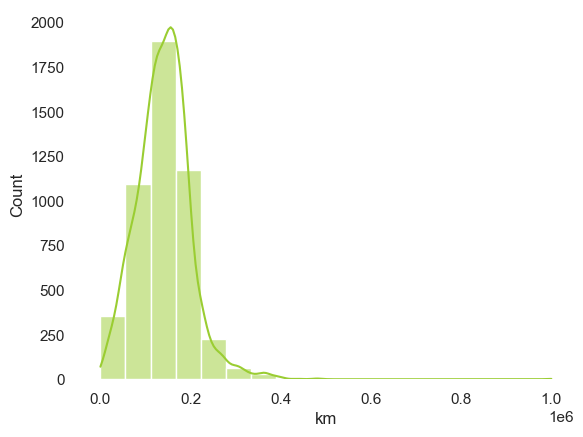

In [300]:
#analisis de la variable KM
sns.histplot(data=df_bmw, x="km", bins=18,color="yellowgreen", kde = True)

plt.show();

la variable km se encuentra distribuida mas hacia la izquierda

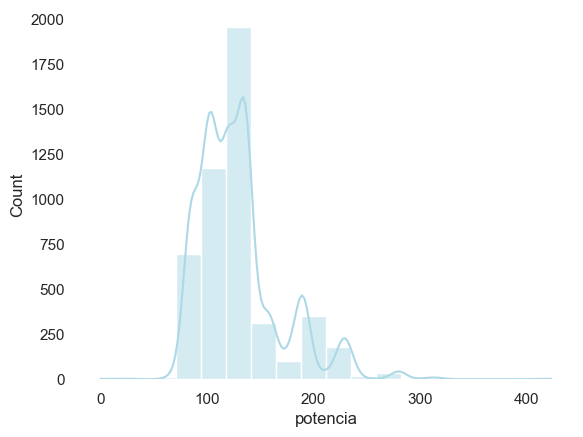

In [301]:
#analisis de la variable potencia
sns.histplot(data=df_bmw, x="potencia", bins=18,color="lightblue", kde = True)

plt.show();

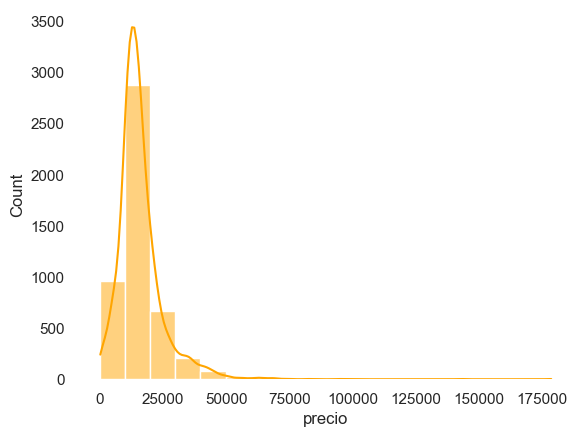

In [302]:
#analisis de la variable precio (NUESTRO TARGET)
sns.histplot(data=df_bmw, x="precio", bins=18,color="orange", kde = True)

plt.show();

# categoricas

In [303]:

# Mostrar frecuencia de cada categoría en algunas variables clave
for col in categoric_cols:
    print(f"\nFrecuencia de {col}:\n")
    print(df_bmw.dropna()[col].value_counts(normalize=True) * 100) 
    # Mostrar en porcentaje
    print("-" * 40)


Frecuencia de modelo:

modelo
320                15.567501
520                13.065950
318                11.722142
X3                  9.055200
116                 7.401282
                     ...    
M135                0.020674
225                 0.020674
i8                  0.020674
630                 0.020674
214 Gran Tourer     0.020674
Name: proportion, Length: 76, dtype: float64
----------------------------------------

Frecuencia de fecha_registro:

fecha_registro
2013-07-01    51.912342
2014-03-01     1.715940
2014-05-01     1.674592
2013-01-01     1.612570
2013-10-01     1.591896
                ...    
2007-01-01     0.020674
1990-03-01     0.020674
2006-11-01     0.020674
1994-01-01     0.020674
2005-09-01     0.020674
Name: proportion, Length: 180, dtype: float64
----------------------------------------

Frecuencia de tipo_gasolina:

tipo_gasolina
diesel           95.720488
petrol            3.948729
hybrid_petrol     0.165392
Diesel            0.103370
electro      

Aqui podemos deducir en cada categoria lo siguiente:
- el modelo 320 y 520 son los más comunes.
- diesel es el tipo de combustible más frecuente.
- negro y blanco son los colores más populares. 
- estate es el tipo de coche mas comun.
- un poco mas de la mitad de coches tienen volante regulable.
- el 82% de los coches tienen aire acondicionado.
- camara trasera no es tan comun el 20 solamente lo tiene.
- el 78% tiene bluetooh.
- 62% tiene alerta de limite de velocidad.
- y el elevacunas trasero casi la mitad tiene y la otra mitad no.
- la fecha de registro la analizare mas abajo.
   

In [304]:
print(df_bmw[col].value_counts(normalize=True) * 100) 

fecha_venta
2018-05-01    16.725170
2018-03-01    15.238489
2018-04-01    14.268016
2018-06-01    12.450960
2018-07-01    11.088168
2018-08-01    10.881685
2018-02-01    10.365476
2018-09-01     4.604584
2018-01-01     4.294859
2007-08-01     0.020648
2010-04-01     0.020648
2009-04-01     0.020648
2008-06-01     0.020648
Name: proportion, dtype: float64


# 5. Correlación de los datos